<a href="https://colab.research.google.com/github/SaiSravan-123/mobile-device-data-usage/blob/main/Mobile_Device_Usage_and_User_Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 User Behavior Data Analysis Project

---

This project performs an exploratory data analysis (EDA) on a user behavior dataset. We aim to understand patterns in app usage, battery drain, and device preferences among different user age groups.


##  Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pywaffle > /dev/null
from pywaffle import Waffle
import warnings
warnings.filterwarnings("ignore")


# Set plot style
sns.set(style="whitegrid")

##  Loading the Dataset

In [ ]:

# Load the user behavior dataset
df = pd.read_csv('/content/user_behavior_dataset.csv')

# Display the first few rows
df.head(10)


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
5,6,Google Pixel 5,Android,99,2.0,940,35,564,31,Male,2
6,7,Samsung Galaxy S21,Android,350,7.3,1802,66,1054,21,Female,4
7,8,OnePlus 9,Android,543,11.4,2956,82,1702,31,Male,5
8,9,Samsung Galaxy S21,Android,340,7.7,2138,75,1053,42,Female,4
9,10,iPhone 12,iOS,424,6.6,1957,75,1301,42,Male,4


##  Dataset Information

In [ ]:

# Overview of dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [ ]:

# Basic statistical summary
df.describe(exclude='object').style.background_gradient(cmap='BuPu')


,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.500000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.216880,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.000000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.750000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.500000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.250000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.000000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [ ]:

# Categorical data summary
df.describe(exclude=['float', 'int64']).style.set_properties(**{'background-color': '#4A235A', 'color': '#E2EEF3'})


,Device Model,Operating System,Gender
count,700,700,700
unique,5,2,2
top,Xiaomi Mi 11,Android,Male
freq,146,554,364


##  Feature Engineering

In [ ]:

# Creating Age Groups
age_bins = pd.cut(df['Age'], bins=[0, 18, 30, 50, 80], labels=['Children', 'Young Adults', 'Adults', 'Seniors'])
df['Age Group'] = age_bins

# Categorizing device models
conditions = [
    (df['Device Model'].str.contains('Samsung', case=False)),
    (df['Device Model'].str.contains('iPhone', case=False)),
    (df['Device Model'].str.contains('Huawei', case=False))
]
choices = ['Samsung', 'iPhone', 'Huawei']
df['Device Brand'] = np.select(conditions, choices, default='Other')


##  Data Visualization

###  Age Group Distribution

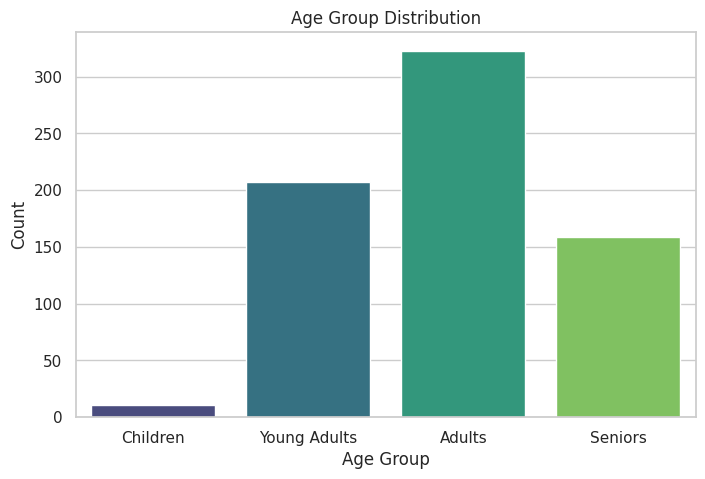

In [ ]:

plt.figure(figsize=(8,5))
sns.countplot(x='Age Group', data=df, palette='viridis')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


###  Device Brand Distribution

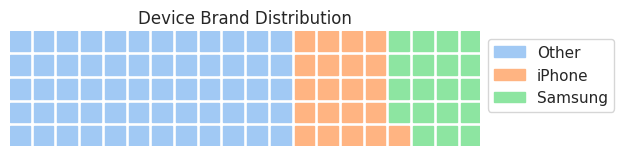

In [ ]:
# Device Brand Distribution (fixed)
brand_counts = df['Device Brand'].value_counts()
brand_colors = sns.color_palette('pastel', n_colors=len(brand_counts))  # Dynamically choose colors

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=20,
    values=brand_counts.to_dict(),
    colors=brand_colors,
    title={'label': 'Device Brand Distribution', 'loc': 'center'},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)
plt.show()


###  App Usage Time Analysis

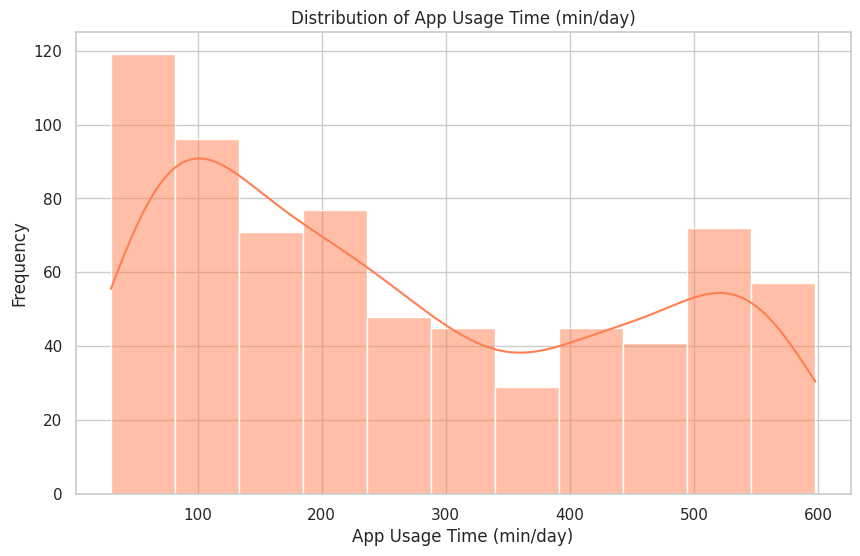

In [ ]:

plt.figure(figsize=(10,6))
sns.histplot(df['App Usage Time (min/day)'], kde=True, color='coral')
plt.title('Distribution of App Usage Time (min/day)')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Frequency')
plt.show()


###  Battery Drain Analysis

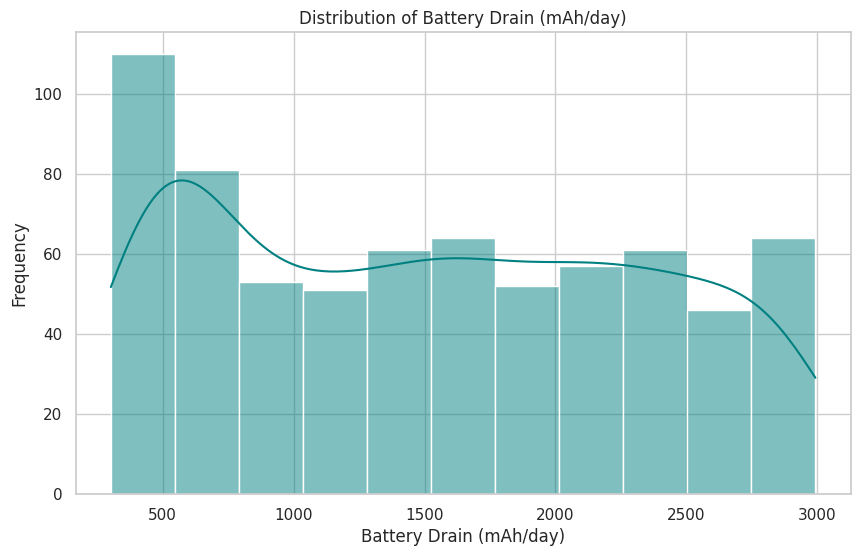

In [ ]:

plt.figure(figsize=(10,6))
sns.histplot(df['Battery Drain (mAh/day)'], kde=True, color='teal')
plt.title('Distribution of Battery Drain (mAh/day)')
plt.xlabel('Battery Drain (mAh/day)')
plt.ylabel('Frequency')
plt.show()


###  High vs Normal App Usage Users

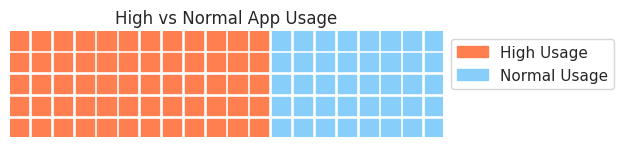

In [ ]:

# Define threshold
APP_USAGE_THRESHOLD = 180

high_usage = df[df['App Usage Time (min/day)'] > APP_USAGE_THRESHOLD]['App Usage Time (min/day)'].count()
normal_usage = df[df['App Usage Time (min/day)'] <= APP_USAGE_THRESHOLD]['App Usage Time (min/day)'].count()

# Waffle plot
fig = plt.figure(FigureClass=Waffle, rows=5, columns=20,
    values={'High Usage': high_usage, 'Normal Usage': normal_usage},
    colors=["#FF7F50", "#87CEFA"],
    title={'label': 'High vs Normal App Usage', 'loc': 'center'},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)
plt.show()


###  High vs Normal Battery Drain Users

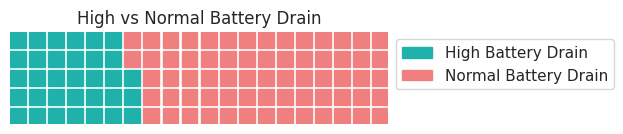

In [ ]:

BATTERY_DRAIN_THRESHOLD = 2000

high_battery = df[df['Battery Drain (mAh/day)'] > BATTERY_DRAIN_THRESHOLD]['Battery Drain (mAh/day)'].count()
normal_battery = df[df['Battery Drain (mAh/day)'] <= BATTERY_DRAIN_THRESHOLD]['Battery Drain (mAh/day)'].count()

# Waffle plot
fig = plt.figure(FigureClass=Waffle, rows=5, columns=20,
    values={'High Battery Drain': high_battery, 'Normal Battery Drain': normal_battery},
    colors=["#20B2AA", "#F08080"],
    title={'label': 'High vs Normal Battery Drain', 'loc': 'center'},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)
plt.show()


##  Conclusion

- Majority of users are Young Adults and Adults.
- Samsung and iPhone dominate the device brands.
- Most users have a normal app usage time and normal battery drain.
- Waffle charts clearly visualize usage patterns.
